In [10]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

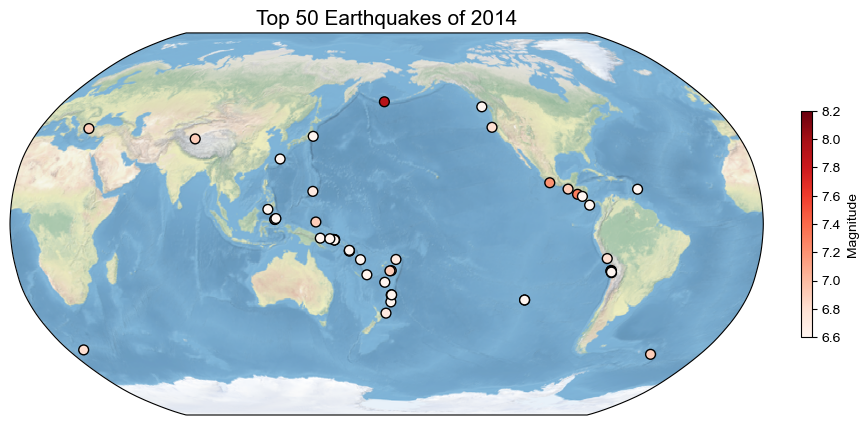

In [11]:
# 1
# read csv file, sort the magnitude (descending order), take the first 50 rows.
ear = pd.read_csv('usgs_earthquakes.csv')
Mag = ear.sort_values('mag',ascending=False).head(50)

# Create an axes with Robinson projection style
plt.figure(figsize=(12,12), dpi=100)
proj = ccrs.Robinson(central_longitude=180, globe=None)
ax = plt.axes(projection=proj)
ax.set_global()
ax.stock_img()
lon = Mag.longitude
lat = Mag.latitude
# plot scatter 
sc = ax.scatter(lon,lat,c=Mag.mag,s=50,marker='o',cmap='Reds',vmin=6.6,vmax=8.2,edgecolors='k',transform=ccrs.PlateCarree())
# add colorbar
plt.colorbar(sc,ax=ax,shrink=0.25,pad=0.04,label='Magnitude')
# add title
plt.title('Top 50 Earthquakes of 2014',fontsize=15)

plt.show()


In [12]:
# 2 
ds = xr.open_dataset('air.sig995.2012.nc',engine='netcdf4')

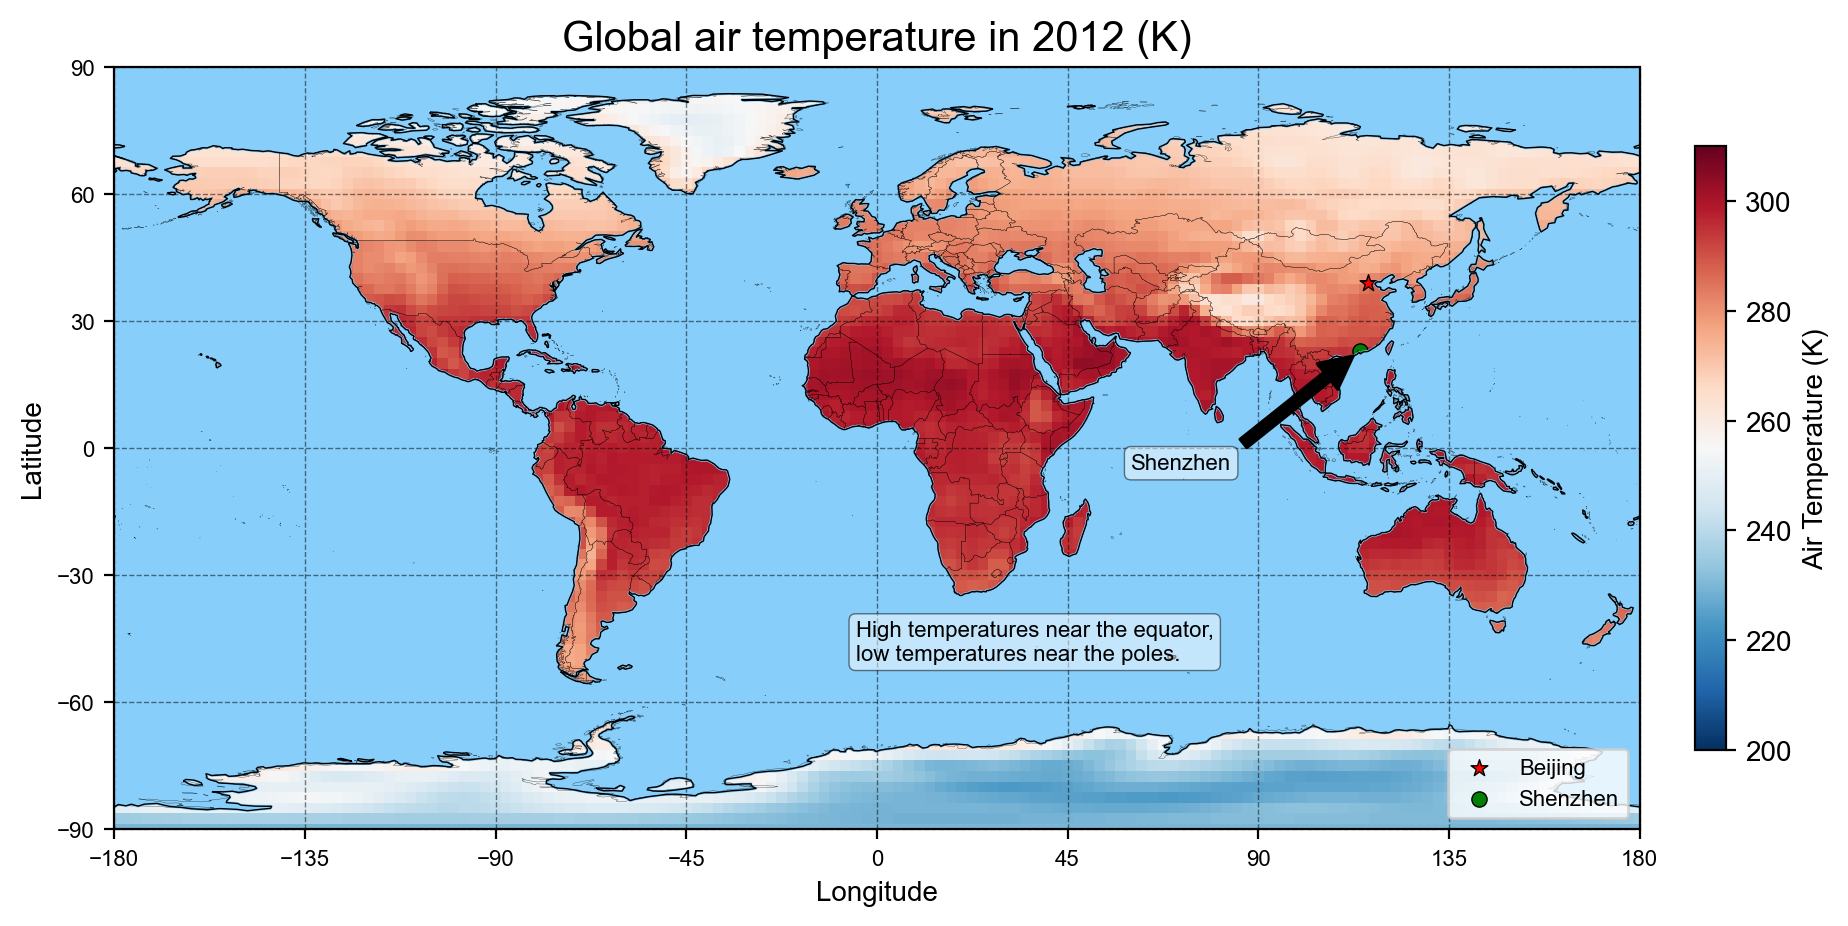

In [13]:
# 2.1
plt.figure(figsize=(12,10), dpi=200)
# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN,facecolor='lightskyblue',zorder=1)
ax.add_feature(cfeature.COASTLINE,linewidth=0.5, zorder=2)

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.1))

air = ds.air.mean('time')
# colorbar
air.plot(ax=ax, transform=ccrs.PlateCarree(),zorder=0, vmin=200, vmax=310, cmap='RdBu_r',
              cbar_kwargs={'shrink':0.4,'pad':0.03,'label':'Air Temperature (K)'})

# x label and ticks
plt.xticks(ticks=np.linspace(-180, 180, 9), fontsize=8)
plt.xlabel('Longitude',fontsize=10)

# y label and ticks
plt.yticks(ticks=np.linspace(-90, 90, 7), fontsize=8)
plt.ylabel('Latitude',fontsize=10)

# title
plt.title('Global air temperature in 2012 (K)',fontsize=15)

# gridlines
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5,color='k')

# legend
plt.scatter(116,39,s=40,c='r',marker='*',label='Beijing',edgecolors='k', linewidths=0.5)
plt.scatter(114,23,s=30,c='green',marker='o',label='Shenzhen',edgecolors='k', linewidths=0.5)
plt.legend(loc='lower right',fontsize=8)

# annotations
plt.annotate(text='Shenzhen',xy=(114,23),xytext=(60,-5),fontsize=8,
             arrowprops=dict(facecolor='k',shrink=0.05),
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="k", lw=0.5, alpha=0.5))

# text box
plt.text(-5,-50, 'High temperatures near the equator,\nlow temperatures near the poles.', fontsize=8,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="k", lw=0.5, alpha=0.5))

plt.show()

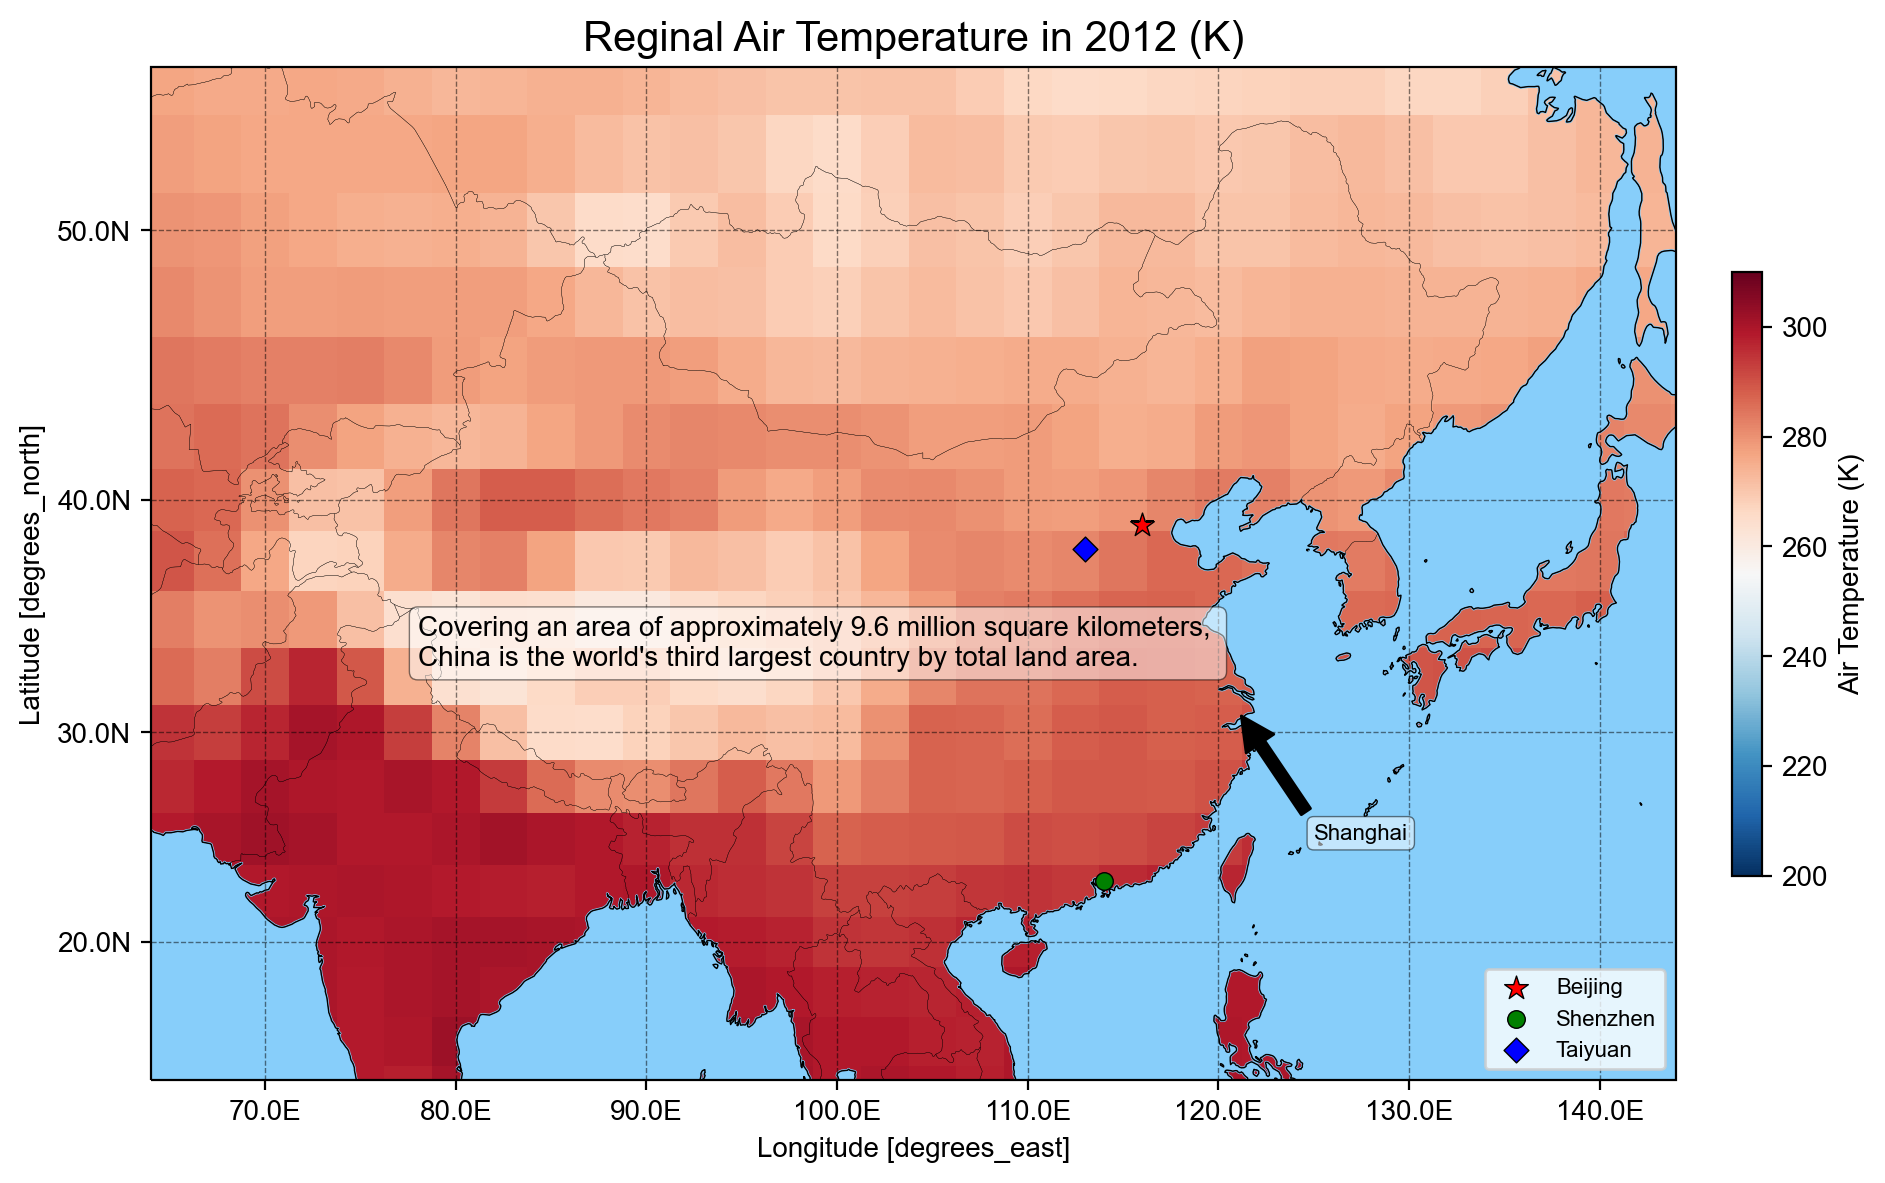

In [16]:
# 2.2 
plt.figure(figsize=(12,10), dpi=200)
plt.rcParams['font.family'] = 'Arial'
# Set Mercator projection style
proj = ccrs.Mercator() 
ax = plt.axes(projection=proj)

# x label and ticks 
# y label and ticks 
ax.set_xticks([70, 80, 90, 100, 110, 120, 130, 140], crs=ccrs.PlateCarree())
ax.set_yticks([10, 20, 30, 40, 50, 60], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.1f',
                                       degree_symbol='',
                                       dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f',
                                      degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Set a region and plot
central_lon, central_lat = 114, 23 
extent = [central_lon-50, central_lon+30, central_lat-10, central_lat+25]
ax.set_extent(extent)

# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN,facecolor='lightskyblue',zorder=1)
ax.add_feature(cfeature.COASTLINE,linewidth=0.5, zorder=2)

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.1))

air = ds.air.mean('time')
# colorbar
air.plot(ax=ax, transform=ccrs.PlateCarree(),zorder=0, vmin=200, vmax=310, cmap='RdBu_r',
              cbar_kwargs={'shrink':0.4,'pad':0.03,'label':'Air Temperature (K)'})

# title
ax.set_title('Reginal Air Temperature in 2012 (K)',fontsize=15)

# gridlines
ax.gridlines(crs=ccrs.PlateCarree(),linestyle='--', linewidth=0.5, alpha=0.5,color='k')

# legend 
ax.scatter(116,39,s=80,c='r',marker='*',label='Beijing',edgecolors='k', linewidths=0.5,zorder=3,transform=ccrs.PlateCarree())
ax.scatter(114,23,s=40,c='g',marker='o',label='Shenzhen',edgecolors='k', linewidths=0.5,zorder=4,transform=ccrs.PlateCarree())
ax.scatter(113,38,s=40,c='b',marker='D',label='Taiyuan',edgecolors='k', linewidths=0.5,zorder=5,transform=ccrs.PlateCarree())
ax.legend(loc='lower right',fontsize=8)

transform = ccrs.PlateCarree()._as_mpl_transform(ax)
# annotations
ax.annotate(text='Shanghai',xy=(121,31),xytext=(125,25),fontsize=8,
             arrowprops=dict(facecolor='k',shrink=0.05),
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="k", lw=0.5, alpha=0.5),xycoords=transform)

# text box
ax.text(78,33, 
        "Covering an area of approximately 9.6 million square kilometers, \nChina is the world's third largest country by total land area.",
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="k", lw=0.5, alpha=0.5),
         horizontalalignment='left',transform=ccrs.PlateCarree())

plt.show()